In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Set your directory here
directory = "../Resiel Maps/Resiel Precision Maps/Cleaned_joined_output/DEM_joined_output"

files = [f for f in os.listdir(directory) if f.endswith('.csv')]
df_list = []

for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df['Year'] = file.split('_')[2]
    df_list.append(df)

# concatenate them together
final_df = pd.concat(df_list)
final_df = final_df[final_df['PlotID'] > 0]
final_df['PlotID'] = final_df['PlotID'].astype(int).astype(str)
final_df = final_df[['Longitude', 'Latitude', 'Yield', 'Moisture', 'Year', 'PlotID', 'FieldID', 'elevation', 'slope', 'aspect']]
final_df = final_df[final_df['FieldID'] == 'Y8']

final_df.head()

,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect
2378,-96.882079,31.471076,45.756,10.8,2018,4,Y8,166.539581,0.884491,31.614458
2379,-96.882101,31.471064,54.886,10.8,2018,4,Y8,166.545471,1.954426,72.089645
2380,-96.882125,31.471052,47.300,10.8,2018,4,Y8,166.629089,0.841660,71.193375
2381,-96.882149,31.471041,48.180,10.8,2018,4,Y8,166.657425,1.027649,92.297424
2382,-96.882173,31.471028,50.659,10.8,2018,4,Y8,166.801193,3.381945,65.845612


# Y8

In [3]:
# Key 
# Controls:
# {5: [1, 6, 13], 7: [3, 6, 8], 10: [6, 9, 11], 12: [8, 11, 16], 13: [9, 14, 17], 15: [14, 16, 19], 18: [17, 19, 22], 20: [16, 19, 24], 21: [17, 22, 25], 23: [22, 24, 27], 26: [22, 25, 27], 28: [24, 27, 32]}
# Define the dictionary for 'PlotID' and 'Controls'
control_dict = {5: [1, 6, 13], 7: [3, 6, 8], 10: [6, 9, 11], 12: [8, 11, 16], 13: [9, 14, 17], 15: [14, 16, 19], 18: [17, 19, 22], 20: [16, 19, 24], 21: [17, 22, 25], 23: [22, 24, 27], 26: [22, 25, 27], 28: [24, 27, 32]}
control_dict = {str(k): [str(i) for i in v] for k, v in control_dict.items()}

final_df_controls = final_df.copy()

# Define the dictionary for 'PlotID' and 'Optional controls'


# Define a function that assigns controls based on FieldID and PlotID
def assign_controls(row, controls_dict):
    if row['FieldID'] == 'Y10' and str(row['PlotID']) in controls_dict:
        return controls_dict[str(row['PlotID'])]
    else:
        return 'None'

# Apply the function to create the new 'Controls' column
final_df_controls['Controls'] = final_df_controls.apply(assign_controls, args=(control_dict,), axis=1)
# Apply the function to create the new 'Optional controls' column
# final_df_controls['Optional controls'] = final_df_controls.apply(assign_controls, args=(optional_controls_dict,), axis=1)

# final_df_controls = final_df_controls[final_df_controls['Controls'] != 'None']
final_df_controls.head()

,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls
2378,-96.882079,31.471076,45.756,10.8,2018,4,Y8,166.539581,0.884491,31.614458,None
2379,-96.882101,31.471064,54.886,10.8,2018,4,Y8,166.545471,1.954426,72.089645,None
2380,-96.882125,31.471052,47.300,10.8,2018,4,Y8,166.629089,0.841660,71.193375,None
2381,-96.882149,31.471041,48.180,10.8,2018,4,Y8,166.657425,1.027649,92.297424,None
2382,-96.882173,31.471028,50.659,10.8,2018,4,Y8,166.801193,3.381945,65.845612,None


In [4]:
control_dict

{'5': ['1', '6', '13'],
 '7': ['3', '6', '8'],
 '10': ['6', '9', '11'],
 '12': ['8', '11', '16'],
 '13': ['9', '14', '17'],
 '15': ['14', '16', '19'],
 '18': ['17', '19', '22'],
 '20': ['16', '19', '24'],
 '21': ['17', '22', '25'],
 '23': ['22', '24', '27'],
 '26': ['22', '25', '27'],
 '28': ['24', '27', '32']}

In [18]:
# Treatments:
# Low = 5, 7, 21, 23
# Medium = 10, 12, 18, 20 
# High = 13, 15, 26, 27

final_df_controls_treatments = final_df_controls.copy()

# Define the lists of PlotIDs for each treatment
low = ['5', '7', '21', '23']
medium = ['10', '12', '18', '20']
high = ['13', '15', '26', '28']

# Define a function to determine the treatment based on PlotID
def assign_treatment(plot_id):
    if plot_id in low:
        return 'Low'
    elif plot_id in medium:
        return 'Medium'
    elif plot_id in high:
        return 'High'
    else:
        return 'Control'

# Apply the function to the 'PlotID' column to create the new 'Treatment' column
final_df_controls_treatments['Treatment'] = final_df_controls_treatments['PlotID'].apply(assign_treatment)
final_df_controls_only = final_df_controls_treatments.copy()
final_df_controls_only = final_df_controls_only[final_df_controls_only['Controls'] == 'None']
final_df_treatments = final_df_controls_treatments[final_df_controls_treatments['Treatment'] != 'Control']
final_df_treatments.head()

,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls,Treatment
2473,-96.882951,31.470713,45.085,10.9,2018,7,Y8,168.269119,2.279781,55.126720,None,Low
2474,-96.882973,31.470701,44.671,10.9,2018,7,Y8,168.265671,1.358262,221.863190,None,Low
2475,-96.883001,31.470689,35.620,10.9,2018,7,Y8,168.182999,0.340291,56.713093,None,Low
2476,-96.883027,31.470677,49.423,10.9,2018,7,Y8,168.231094,1.206285,44.478878,None,Low
2477,-96.883051,31.470666,41.143,10.8,2018,7,Y8,168.228561,1.798426,109.828484,None,Low


In [19]:
final_df_controls_only.head()

,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls,Treatment
2378,-96.882079,31.471076,45.756,10.8,2018,4,Y8,166.539581,0.884491,31.614458,None,Control
2379,-96.882101,31.471064,54.886,10.8,2018,4,Y8,166.545471,1.954426,72.089645,None,Control
2380,-96.882125,31.471052,47.300,10.8,2018,4,Y8,166.629089,0.841660,71.193375,None,Control
2381,-96.882149,31.471041,48.180,10.8,2018,4,Y8,166.657425,1.027649,92.297424,None,Control
2382,-96.882173,31.471028,50.659,10.8,2018,4,Y8,166.801193,3.381945,65.845612,None,Control


## Calculating relative yield

In [33]:
# Convert 'Yield' to numeric type for both DataFrames
final_df_controls_only['Yield'] = pd.to_numeric(final_df_controls_only['Yield'])
final_df_treatments['Yield'] = pd.to_numeric(final_df_treatments['Yield'])

# Calculate average yield for each PlotID and Year in controls DataFrame
average_yield_controls = final_df_controls_only.groupby(['PlotID', 'Year'])['Yield'].mean().to_dict()

# Create a copy of the treatments DataFrame for manipulation
final_df_treatments_plotting = final_df_treatments.copy()

# Create a new column "Average Control Yield" in final_df_treatments using average_yield_controls and control_dict
# Here we get the average yield for each control and then take the mean of those averages
final_df_treatments_plotting['Average Control Yield'] = [
    np.mean([average_yield_controls.get((control, row['Year']), np.nan) for control in control_dict[str(row['PlotID'])]])
    for index, row in final_df_treatments.iterrows()
]

# Now calculate "Relative Yield" using "Yield" and "Average Control Yield" for each row in final_df_treatments
final_df_treatments_plotting['Relative Yield'] = [
    (row['Yield'] - row['Average Control Yield']) / row['Average Control Yield'] * 100 
    for index, row in final_df_treatments_plotting.iterrows()
]

# Print the head of final_df_treatments
final_df_treatments_plotting.head()

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls,Treatment,Average Control Yield,Relative Yield
2473,-96.882951,31.470713,45.085,10.9,2018,7,Y8,168.269119,2.279781,55.126720,None,Low,43.464193,3.729063
2474,-96.882973,31.470701,44.671,10.9,2018,7,Y8,168.265671,1.358262,221.863190,None,Low,43.464193,2.776555
2475,-96.883001,31.470689,35.620,10.9,2018,7,Y8,168.182999,0.340291,56.713093,None,Low,43.464193,-18.047483
2476,-96.883027,31.470677,49.423,10.9,2018,7,Y8,168.231094,1.206285,44.478878,None,Low,43.464193,13.709692
2477,-96.883051,31.470666,41.143,10.8,2018,7,Y8,168.228561,1.798426,109.828484,None,Low,43.464193,-5.340472


In [32]:
final_df_treatments_plotting['FieldID'] = 'Y8'
final_df_treatments_plotting.to_csv('../Data/Relative_yield/Y8.csv')

## Plotting

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

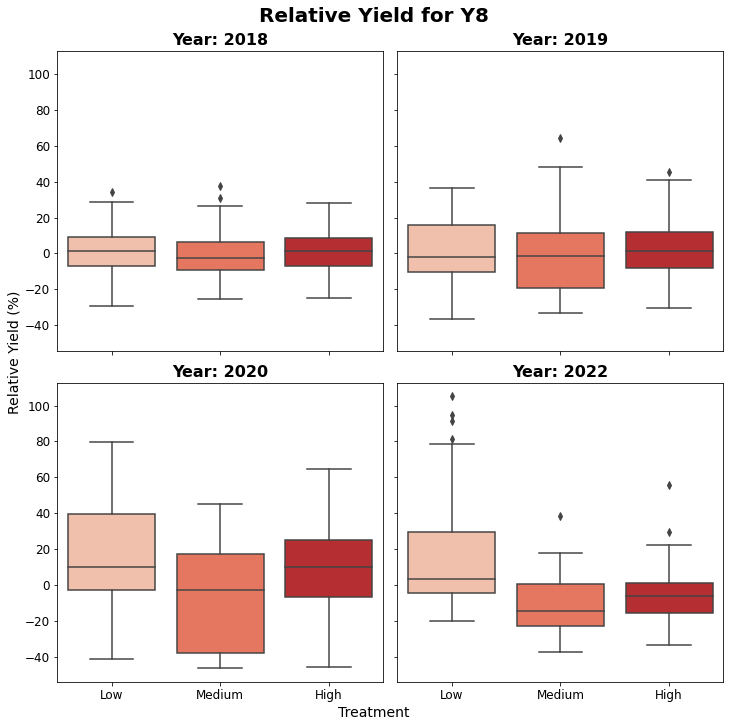

In [34]:
# Assuming 'Year' column is categorical and contains four distinct years
years = final_df_treatments_plotting['Year'].unique()

fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

# Setting font sizes
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
title_font = {'fontname':'DejaVu Sans', 'size':'16', 'color':'black', 'weight':'bold'}

treatment_order = ['Low', 'Medium', 'High']  # Order of categories on x-axis

for ax, year in zip(axs.flatten(), years):
    data = final_df_treatments_plotting[final_df_treatments_plotting['Year'] == year]
    sns.boxplot(x='Treatment', y='Relative Yield', data=data, ax=ax, palette="Reds", order=treatment_order)
    ax.set_title(f'Year: {year}', **title_font)
    ax.set_xlabel('')  # remove individual subplot x-axis label
    ax.set_ylabel('')  # remove individual subplot y-axis label

# Set a common x and y labels
fig.text(0.5, 0, 'Treatment', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'Relative Yield (%)', ha='center', va='center', rotation='vertical', fontsize=14)

# Adding title for the entire figure
fig.suptitle("Relative Yield for Y8", fontsize=20, weight='bold')

plt.tight_layout()
plt.savefig('../Manuscript/Figures/Y-8_relative_yield.jpg', bbox_inches = 'tight', dpi = 300)

# Random forest

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Let's suppose your DataFrame is final_df_treatments_plotting
df = final_df_treatments_plotting

# Save the count of NaNs before filling
nans_before = df.isna().sum().sum()

# Fill the NaNs with column means
df.fillna(df.mean(), inplace=True)

# Save the count of NaNs after filling
nans_after = df.isna().sum().sum()

# The number of replaced NaNs is the difference
num_replaced = nans_before - nans_after

print(f"Replaced {num_replaced} NaN values with column means.")

# Define predictors and target
X = df[['Moisture', 'elevation', 'slope', 'aspect', 'Year']]
y = df['Relative Yield']

# Replace inf values if any, np.inf is used as a large number as a placeholder
X.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Set up parameters for grid search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a random forest regressor
rf = RandomForestRegressor()

# Initialize grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Use best model from grid search
best_grid = grid_search.best_estimator_

# Predict
y_pred = best_grid.predict(X_test)

# Calculate R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Get feature importances
feature_importances = best_grid.feature_importances_

# Save results in dictionary
results = {
    'r2': r2,
    'mse': mse,
    'feature_importances': dict(zip(X.columns, feature_importances))
}

Replaced 88 NaN values with column means.
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   48.6s finished


In [36]:
results

{'r2': 0.5919929314621574,
 'mse': 166.93583148246915,
 'feature_importances': {'Moisture': 0.23934685515690887,
  'elevation': 0.46983994094828463,
  'slope': 0.09374089992546075,
  'aspect': 0.08407651799106372,
  'Year': 0.112995785978282}}